# Neural Network Exercise: Classification and Regression

This exercise tests your ability to build, train, and evaluate neural networks for **classification** and **regression** tasks using TensorFlow and Keras. You will work with two datasets:

- **Classification**: Wine Quality dataset (predict wine quality as a category).
- **Regression**: Auto MPG dataset (predict fuel efficiency in miles per gallon).

Follow the instructions below. Replace the `# YOUR CODE HERE` placeholders with your code. Each section includes a single code cell for the task.

## Instructions
- Complete all sections for both tasks.
- Run each cell after filling in your code.
- Submit the completed notebook.


## Part 1: Classification - Wine Quality Dataset

### Instruction 1: Load the Data

Load the Wine Quality dataset using `pandas` from the UCI repository. Split the data into features (`X`) and target (`y`), then into training and testing sets (80-20 split).

In [158]:
# YOUR CODE HERE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [159]:
from sklearn.datasets import fetch_openml
wine = fetch_openml(name='wine-quality-red', version=1, as_frame=True)
data = wine.frame
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed_acidity         1599 non-null   float64 
 1   volatile_acidity      1599 non-null   float64 
 2   citric_acid           1599 non-null   float64 
 3   residual_sugar        1599 non-null   float64 
 4   chlorides             1599 non-null   float64 
 5   free_sulfur_dioxide   1599 non-null   float64 
 6   total_sulfur_dioxide  1599 non-null   float64 
 7   density               1599 non-null   float64 
 8   pH                    1599 non-null   float64 
 9   sulphates             1599 non-null   float64 
 10  alcohol               1599 non-null   float64 
 11  class                 1599 non-null   category
dtypes: category(1), float64(11)
memory usage: 139.3 KB


In [161]:
x=data.drop(columns=['class'])
y=data['class']

In [162]:
y.unique()

['5', '6', '7', '4', '8', '3']
Categories (6, object): ['3', '4', '5', '6', '7', '8']

### Instruction 2: Preprocess the Data

Standardize the features using `StandardScaler`. Map quality scores to 3 categories: low (3-5 -> 0), medium (6 -> 1), high (7-8 -> 2).

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (1279, 11)
x_test shape: (320, 11)
y_train shape: (1279,)
y_test shape: (320,)


In [164]:
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

### Instruction 3: Define the Model

Create a `Sequential` model with two hidden layers (64 and 32 neurons, ReLU activation) and an output layer for 3 classes (softmax activation).

In [165]:
import tensorflow as tf
from tensorflow import keras


In [166]:
tf.random.set_seed(42)

In [167]:
X_train_scaled.shape[1]

11

In [168]:
model=keras.models.Sequential([
    keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(9,activation='softmax')
])

In [169]:
model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 9)              │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,145 (12.29 KB)

 Trainable params: 3,145 (12.29 KB)

 Non-trainable params: 0 (0.00 B)

### Instruction 4: Compile and Train the Model

Compile the model with `sparse_categorical_crossentropy` loss, `adam` optimizer, and `accuracy` metric. Train for 20 epochs, batch size 32, with a 0.2 validation split.

In [170]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [171]:
# from tensorflow.keras.utils import to_categorical

# y_train = y_train.astype('int')  # if still in category
# y_train = to_categorical(y_train)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=9)


In [172]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split = 0.2)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2035 - loss: 2.1190 - val_accuracy: 0.4688 - val_loss: 1.6869
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5108 - loss: 1.5502 - val_accuracy: 0.6055 - val_loss: 1.1950
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5703 - loss: 1.1726 - val_accuracy: 0.6367 - val_loss: 1.0079
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5785 - loss: 1.0371 - val_accuracy: 0.6719 - val_loss: 0.9446
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5938 - loss: 0.9849 - val_accuracy: 0.6758 - val_loss: 0.9154
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6060 - loss: 0.9591 - val_accuracy: 0.6797 - val_loss: 0.8966
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6166 - loss: 0.9423 - val_accuracy: 0.6758 - val_loss: 0.8862
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6223 - loss: 0.9291 - val_accuracy: 0.6719 - v

### Instruction 5: Evaluate and Plot Metrics

Evaluate the model on the test set. Plot training/validation accuracy and loss using `matplotlib`.

Text(0, 0.5, 'Accuracy')

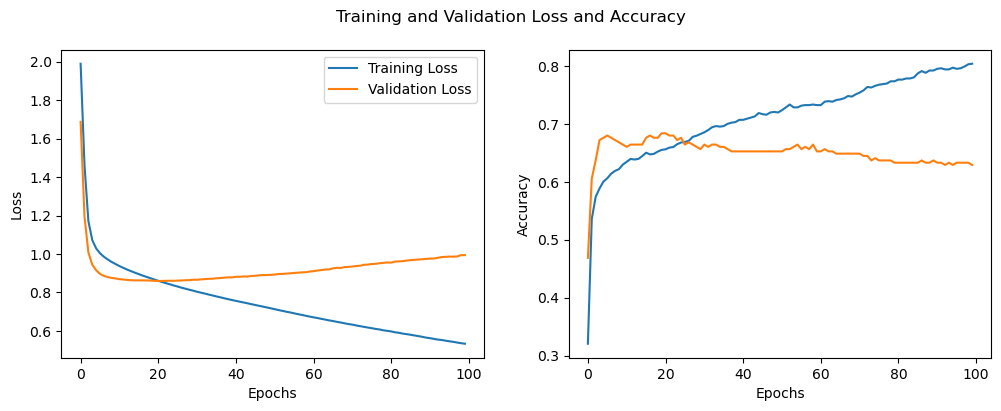

In [173]:
# plot the training and validation loss and accuracies
plt.figure(figsize=(12, 4))
plt.suptitle('Training and Validation Loss and Accuracy')
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [174]:
loss,accuracy=model.evaluate(x_test,y_test)
print(f'loss: {loss}')
print(f'accuracy: {accuracy}')

ValueError: Invalid dtype: category

### Instruction 6: Make Predictions

Predict classes for the first 5 test samples. Convert probabilities to class labels and compare with true labels.

In [ ]:
# YOUR CODE HERE

## Part 2: Regression - Auto MPG Dataset

### Instruction 7: Load the Data

Load the Auto MPG dataset using `pandas`. Handle missing values, then split into features (`X`) and target (`y`), and into training and testing sets (80-20 split).

In [ ]:
from sklearn.datasets import 

SyntaxError: invalid syntax (2871198190.py, line 1)

### Instruction 8: Preprocess the Data

Standardize the features using `StandardScaler`.

In [ ]:
# YOUR CODE HERE

### Instruction 9: Define the Model

Create a `Sequential` model with two hidden layers (64 and 32 neurons, ReLU activation) and a single output neuron (no activation).

In [ ]:
# YOUR CODE HERE

### Instruction 10: Compile and Train the Model

Compile the model with `mean_squared_error` loss, `adam` optimizer, and `mean_absolute_error` metric. Train for 50 epochs, batch size 32, with a 0.2 validation split.

In [ ]:
# YOUR CODE HERE

### Instruction 11: Evaluate and Plot Metrics

Evaluate the model on the test set. Plot training/validation MAE and loss using `matplotlib`.

In [ ]:
# YOUR CODE HERE

### Instruction 12: Make Predictions

Predict MPG for the first 5 test samples and compare with true values.

In [ ]:
# YOUR CODE HERE

## Submission

Save and download this notebook (`File > Download as > Notebook (.ipynb)`). Submit the completed `.ipynb` file. Ensure all code cells run without errors.